# Loading MNIST data

In [ ]:
# Loading data mnist for training
from tensorflow.keras.datasets import mnist
(x_train, labels_train), (x_test, labels_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(labels_train, 10)
y_test = to_categorical(labels_test, 10)

In [ ]:
#  dense layer
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# convolution layer
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Defining neural network

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# different layers https://keras.io/layers/  e.g.:
net = Sequential()
net.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
net.add(MaxPool2D(pool_size=(2, 2)))
net.add(Conv2D(32, (3, 3), activation='relu'))
net.add(MaxPool2D(pool_size=(2, 2)))
net.add(Flatten())
net.add(Dense(256, activation='relu'))
net.add(Dropout(rate=0.5))
net.add(Dense(10, activation='softmax'))
net.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
net.summary()
# Check total parameters

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 800)               0         
                                                                 
 dense_16 (Dense)            (None, 256)              

#  Training neural network

In [ ]:
import tensorflow
# For later use in training network, find combination of these values to get best result
batch_size = [32, 64, 128, 256, 512]
epochs = [10, 15, 20, 25, 30]

row = [tensorflow.keras.callbacks.History() for i in range(len(batch_size))]
# The original way doesn't behave exactly right, this avoids 
# deep nesting of the array. Also adding list(row) to create
# a new object rather than carrying references to row to all rows
history_mat = [list(row) for i in range(len(epochs))]


for i in range(len(batch_size)):
  for j in range(len(epochs)):
    history_mat[i][j] = net.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size[i], epochs=epochs[j])

Epoch 1/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1671 - val_loss: 0.0382
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0585 - val_loss: 0.0330
Epoch 3/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0460 - val_loss: 0.0309
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0352 - val_loss: 0.0259
Epoch 5/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0296 - val_loss: 0.0266
Epoch 6/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0262 - val_loss: 0.0268
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0238 - val_loss: 0.0223
Epoch 8/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0201 - val_loss: 0.0219
Epoch 9/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0185 - val_loss: 0.0272
Epoch 10/10
1875/1875 [==============================] - 57s 30m

<Figure size 432x288 with 0 Axes>

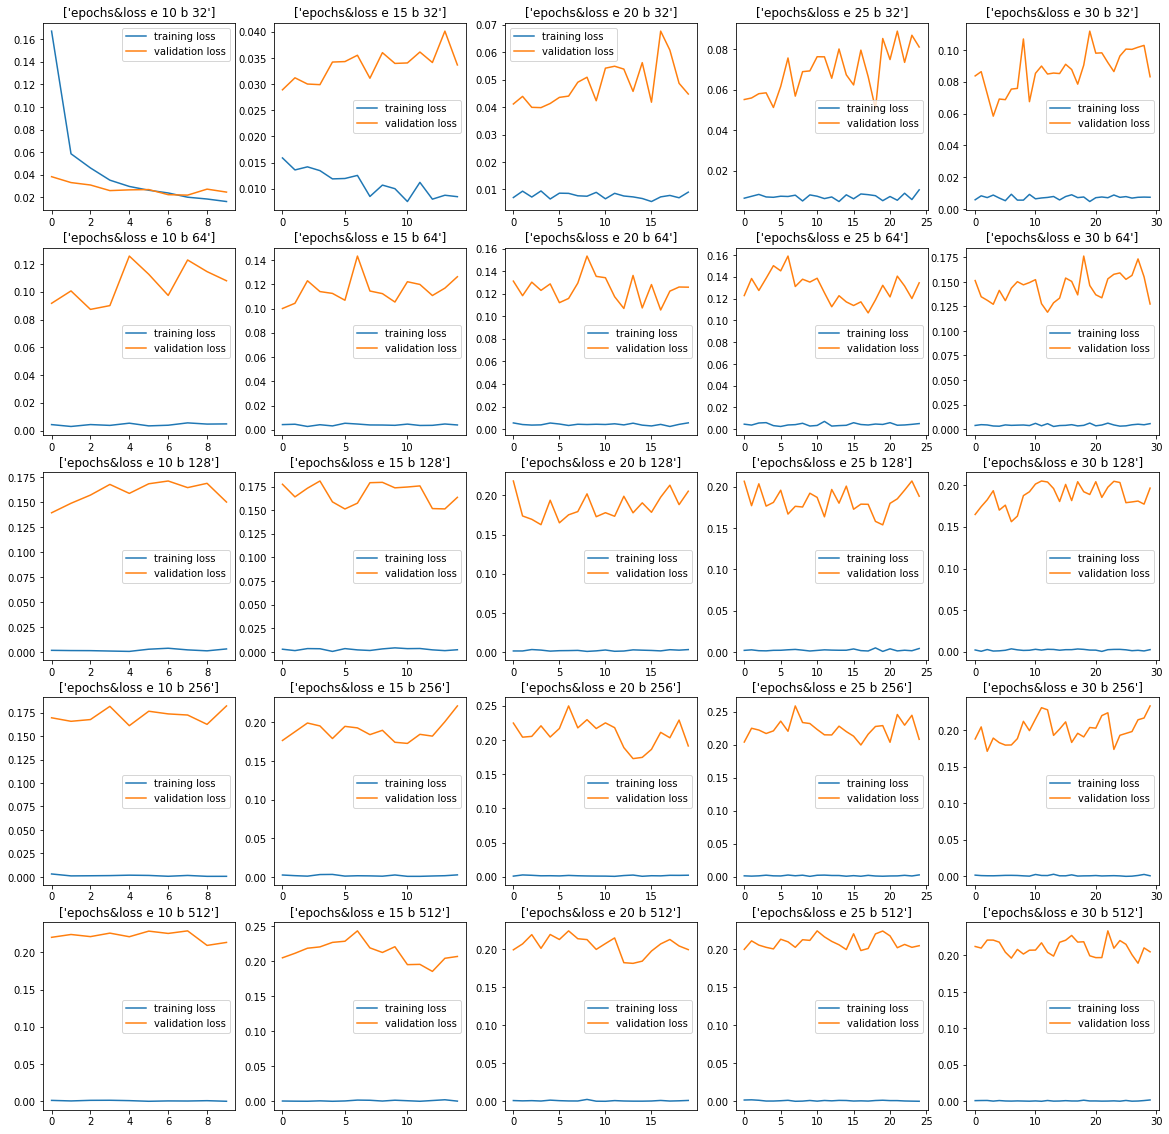

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# history = net.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=256)
# batch_size = [32, 64, 128, 256, 512]
# epochs = [10, 15, 20, 25, 30]

fig = plt.figure()
k=0
fig = plt.figure(figsize=(20, 20))
for i in range(len(batch_size)):
  for j in range(len(epochs)):
    k=k+1
    # ax1 = fig.add_subplot(5,5,k)
    
    fig.add_subplot(5, 5, k)
    h = history_mat[i][j]
    plt.plot(h.history['loss'], label='training loss')
    plt.plot(h.history['val_loss'], label='validation loss')
    # plt.xlabel('epochs')
    # plt.ylabel('loss')
    plt.title(["e "+str(epochs[j])+" b "+str(batch_size[i])])
    plt.legend()


In [ ]:
####################################################
# net.save("network_for_mnist.h5")

# from tensorflow.keras.models import load_model
# net=load_model("network_for_mnist.h5")

# EMNIST data for testing

In [ ]:
!pip install extra-keras-datasets

In [ ]:
from extra_keras_datasets import emnist
(input_train, target_train), (input_test, target_test) = emnist.load_data(type='digits')
print(input_train.shape, target_train.shape)
print(input_test.shape, target_test.shape)

INFO:root:Loading dataset = emnist


(240000, 28, 28) (240000,)
(40000, 28, 28) (40000,)


In [ ]:
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')
input_train /= 255
input_test /= 255
from tensorflow.keras.utils import to_categorical
y_train_emnist = to_categorical(target_train, 10)
y_test_emnist = to_categorical(target_test, 10)

In [ ]:
#  dense layer
input_train = input_train.reshape(240000, 784)
input_test = input_test.reshape(40000, 784)
# convolution layer
input_train = input_train.reshape(input_train.shape[0], 28, 28, 1)
input_test = input_test.reshape(input_test.shape[0], 28, 28, 1)

In [ ]:
import numpy as np
import os
from tensorflow.keras.models import load_model
# #load .h5 file of arbitrary name for testing (last if more than one)
# print(os.getcwd())
# for file in os.listdir(os.getcwd()):
#  if file.endswith(".h5"):
#  print(file)
#  net=load_model(file)
net.summary()

#determine what type of network this is
conf=net.layers[0].get_config()
inshape=conf['batch_input_shape']
if inshape[1]==28:
 netType='CNN'
else:
 netType='MLP'

if netType in ['MLP']:
 input_test = input_test.reshape(40000, 784)
else:
 input_test = input_test.reshape(input_test.shape[0], 28, 28, 1)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 800)               0         
                                                                 
 dense_16 (Dense)            (None, 256)              

In [ ]:
outputs=net.predict(input_test)
labels_predicted=np.argmax(outputs, axis=1)
correct_classified=sum(labels_predicted==target_test)
print('Percentage correctly classified EMNIST=',100*correct_classified/target_test.size)

Percentage correctly classified EMNIST= 9.8175
